# Part 1 - Exploratory Data Analysis

Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_json(r"C:\Users\josia\Desktop\Interview Take Home Challenge\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\logins.json")

In [54]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [55]:
df.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [56]:
df.shape

(93142, 1)

In [57]:
df.dtypes

login_time    datetime64[ns]
dtype: object

In [58]:
df.set_index('login_time', inplace=True)

In [59]:
login_counts = df.resample('15T').size().reset_index(name='login_count')

In [60]:
login_counts.head()

,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [61]:
login_counts.set_index('login_time', inplace=True)

In [62]:
login_counts.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [63]:
plt.style.use('fivethirtyeight')

In [64]:
df = login_counts

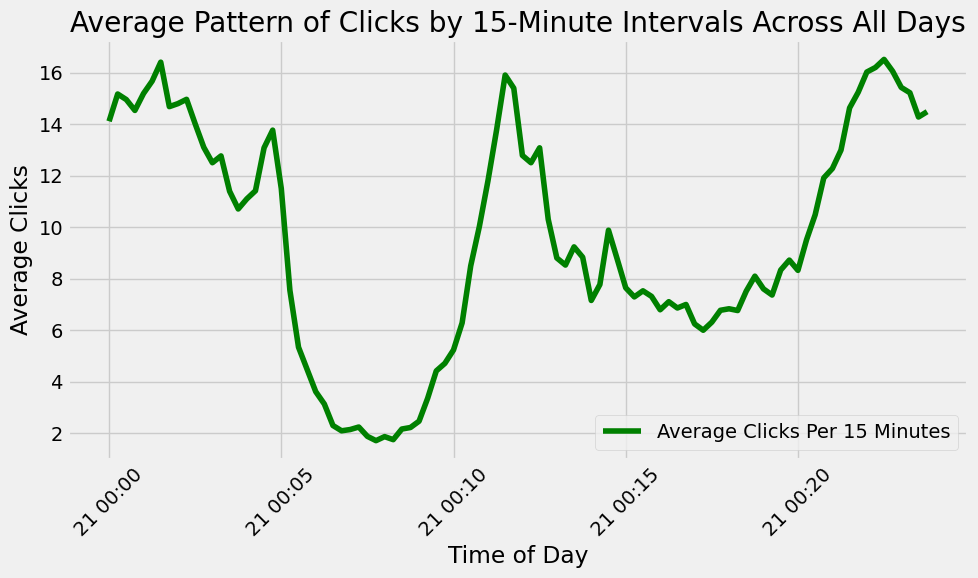

In [70]:
df.index = pd.to_datetime(df.index)

df['15_min_interval'] = df.index.floor('15T').time

average_clicks_per_15min = df.groupby('15_min_interval')['login_count'].mean()

time_numeric = [pd.Timestamp(f'00:{t.hour:02d}:{t.minute:02d}') for t in average_clicks_per_15min.index]

plt.figure(figsize=(10, 6))
plt.plot(time_numeric, average_clicks_per_15min.values, label='Average Clicks Per 15 Minutes', color='green')

plt.title('Average Pattern of Clicks by 15-Minute Intervals Across All Days')
plt.xlabel('Time of Day')
plt.ylabel('Average Clicks')
plt.xticks(rotation=45) 
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

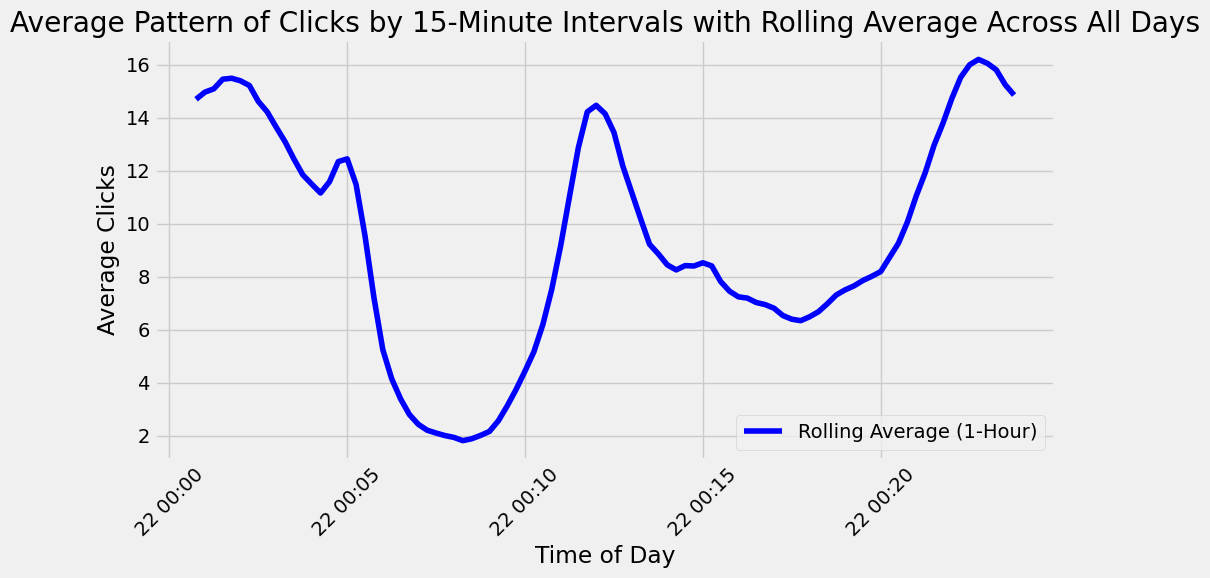

In [77]:
df['15_min_interval'] = df.index.floor('15T').time

average_clicks_per_15min = df.groupby('15_min_interval')['login_count'].mean()

time_numeric = [pd.Timestamp(f'00:{t.hour:02d}:{t.minute:02d}') for t in average_clicks_per_15min.index]

rolling_average = average_clicks_per_15min.rolling(window=4).mean()

plt.figure(figsize=(10, 6))
plt.plot(time_numeric, rolling_average, label='Rolling Average (1-Hour)', color='blue')


plt.title('Average Pattern of Clicks by 15-Minute Intervals with Rolling Average Across All Days')
plt.xlabel('Time of Day')
plt.ylabel('Average Clicks')
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

The general trend across all days is that there is a peak in the early morning and in the early afternoon

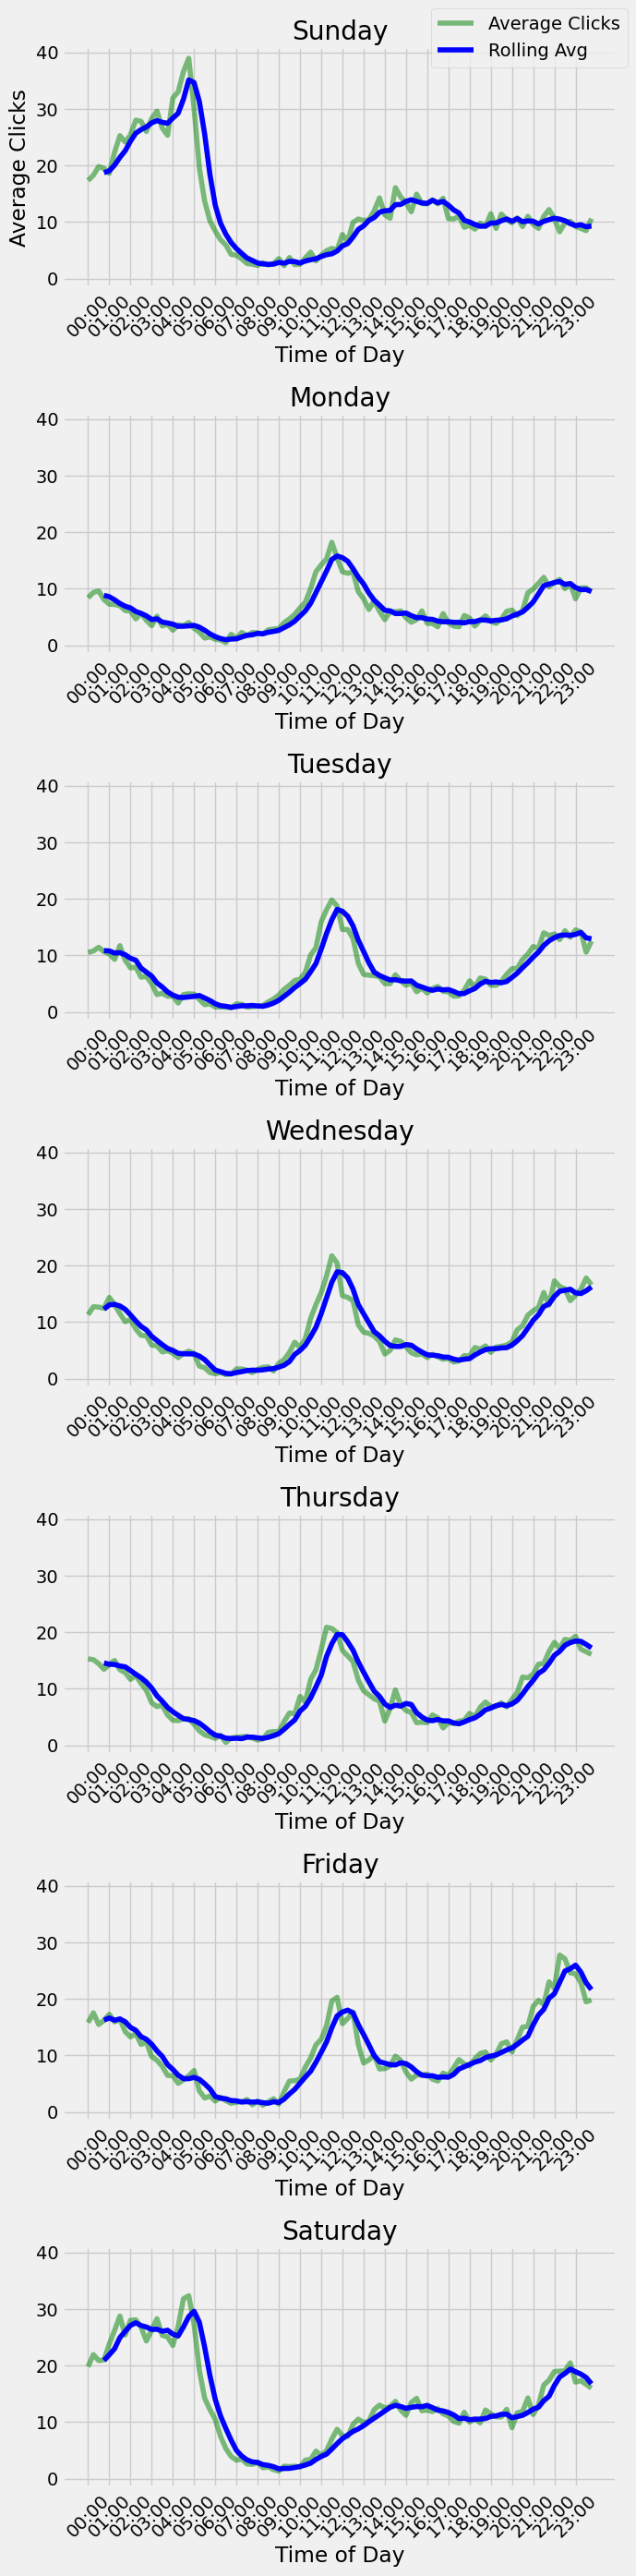

In [101]:
import warnings
warnings.filterwarnings("ignore") 

weekdays = {
    'Sunday': 6,
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5
}

fig, axes = plt.subplots(7, 1, figsize=(7, 28), sharey=True)

for i, (day, weekday_num) in enumerate(weekdays.items()):

    df_day = df[df.index.weekday == weekday_num]
    
    df_day['15_min_interval'] = df_day.index.floor('15T').time
    
    average_clicks_per_15min_day = df_day.groupby('15_min_interval')['login_count'].mean()
    
    time_numeric_day = [pd.Timestamp(f'00:{t.hour:02d}:{t.minute:02d}') for t in average_clicks_per_15min_day.index]
    
    rolling_average_day = average_clicks_per_15min_day.rolling(window=4).mean()
    
    axes[i].plot(time_numeric_day, average_clicks_per_15min_day.values, label=f'Average Clicks', color='green', alpha=0.5)
    axes[i].plot(time_numeric_day, rolling_average_day, label=f'Rolling Avg', color='blue')
    
    axes[i].set_title(day)
    axes[i].set_xlabel('Time of Day')
    axes[i].grid(True)
    
    hour_ticks = pd.date_range('00:00', '23:45', freq='H').time  # Create time ticks for every hour
    axes[i].set_xticks([pd.Timestamp(f'00:{t.hour:02d}:00') for t in hour_ticks])  # Set ticks
    axes[i].set_xticklabels([f'{t.hour:02d}:00' for t in hour_ticks], rotation=45)  # Set labels with rotation
        
        
    if i == 0:  
        axes[i].set_ylabel('Average Clicks')

plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()


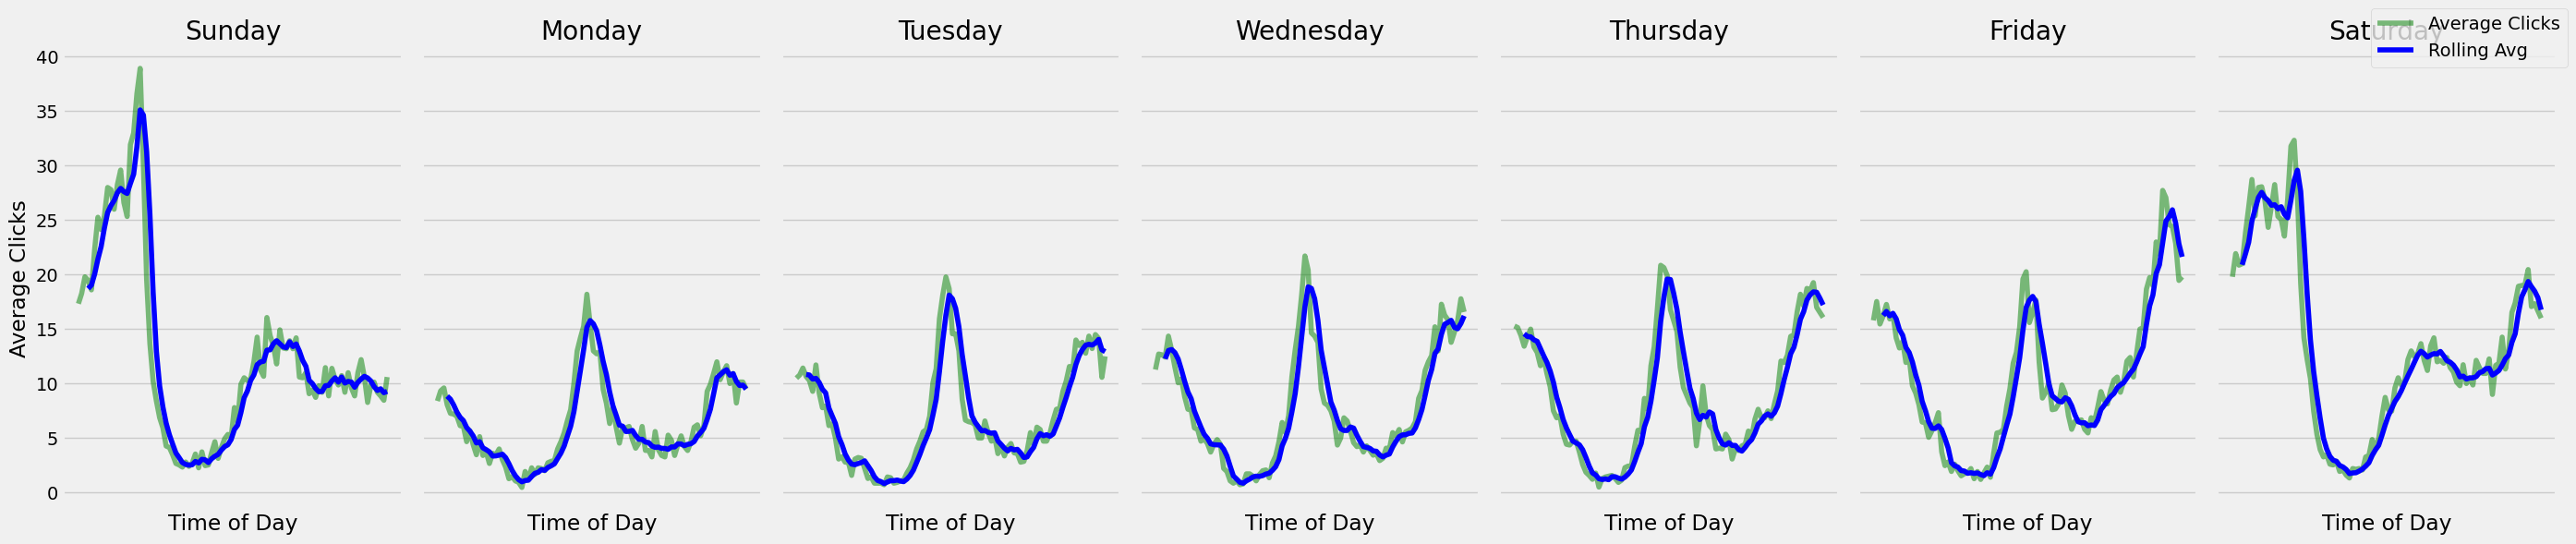

In [97]:
import warnings
warnings.filterwarnings("ignore") 

weekdays = {
    'Sunday': 6,
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5
}

fig, axes = plt.subplots(1, 7, figsize=(28, 6), sharey=True)

for i, (day, weekday_num) in enumerate(weekdays.items()):

    df_day = df[df.index.weekday == weekday_num]
    
    df_day['15_min_interval'] = df_day.index.floor('15T').time
    
    average_clicks_per_15min_day = df_day.groupby('15_min_interval')['login_count'].mean()
    
    time_numeric_day = [pd.Timestamp(f'00:{t.hour:02d}:{t.minute:02d}') for t in average_clicks_per_15min_day.index]
    
    rolling_average_day = average_clicks_per_15min_day.rolling(window=4).mean()
    
    axes[i].plot(time_numeric_day, average_clicks_per_15min_day.values, label=f'Average Clicks', color='green', alpha=0.5)
    axes[i].plot(time_numeric_day, rolling_average_day, label=f'Rolling Avg', color='blue')
    
    axes[i].set_title(day)
    axes[i].set_xlabel('Time of Day')
    axes[i].set_xticks([])
    axes[i].grid(True)
    if i == 0:  
        axes[i].set_ylabel('Average Clicks')

plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()


Based on the data, it looks like the click activity for the weekdays has about 2 peaks. The first is around midnight, the second is around noon. Regarding the weekends, ther is a similar trend; however, the peaks seem to shift forward. Instead of peaking at midnihgt it seems to peak around 4am and then again around 3pm. 

# Part 2 - Experiment and metrics design

Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.



Answer: 

1) I would measure the number of drivers serving both cities as the key measure of success since increasing this value is the ultimate goal of the experiment

2. One practical experiment would be to conduct to select a random set of drivers from both gotham and metropolis who will not be reimbursed on the toll road for a period of two weeks. Measure each person's total rides with labels on if they were done in Gotham or Metropolis. / Then select a random set of drivers from both cities that will be reimbursed. Over a two week period, measure the total rides of each person taken in Gotham and then taken in Metropolis. / Then conduct a proportion chi squared test on the groups to determine if there is a significant increase in the # of drivers who served both cities after the reimbursment policy. If there is a statistically significant increase in the number of drivers who served both cities, I would advise they expand their reimbursment policy. I would provide the caveat that this was a sample and not the whole population. They may want to gradually expand their reimbursment policy and monitor its effect. There could be external effect outside of the reimbursment policy that could have caused the increase in dual city drivers.

# Part 3 - Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

Answer: 1) the faction of retained users was around 38%

Answer: 2) To predict whether a user will be active in their 6th month on Ultimate's system, I built and evaluated three models:

XGBoost Classifier: Achieved the best accuracy score of 74%.
Logistic Regression and Random Forest Classifier were also considered, but they had slightly lower accuracy scores compared to XGBoost.

I selected XGBoost because of its ability to handle complex non-linear relationships, robustness against overfitting, and the accuracy improvements it offers compared to simpler models. In addition to accuracy, I also evaluated the following performance metrics:
Precision: 69%,
Recall: 54%,
F1 Score: 61%.
These metrics provide a more comprehensive view of model performance, especially for imbalanced datasets, where accuracy alone might not be the best indicator of success. The recall score (54%) indicates the model's ability to correctly identify retained users, while the precision score (69%) shows how often the model's positive predictions are correct.


Answer: 3) There are several ways Ultimate could use this model to improve user retention. For one, they could reach out to users who are likely to fall off and provide incentives for them to keep using the service. Additionally, they could conduct a survey of users who are likely to fall off and discover common threads as to what makes those users less likely to continue using Ultimate and what it woudl take to keep them on. 

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE
otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [154]:
df = pd.read_json(r"C:\Users\josia\Desktop\Interview Take Home Challenge\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\ultimate_data_challenge.json")

In [155]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [156]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [157]:
df.shape

(50000, 12)

In [158]:
df.duplicated().sum()

8

In [159]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [160]:
mean_of_driver = df['avg_rating_of_driver'].mean()
mean_by_driver = df['avg_rating_by_driver'].mean()

df['avg_rating_of_driver'].fillna(mean_of_driver, inplace=True)
df['avg_rating_by_driver'].fillna(mean_by_driver, inplace=True)

In [161]:
df.isnull().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64

In [162]:
most_common_phone = df['phone'].mode()[0]

df['phone'].fillna(most_common_phone, inplace=True)

In [163]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [164]:
# Display all occurrences of duplicated rows
all_duplicated_rows = df[df.duplicated(keep=False)]
print("All occurrences of duplicated rows:")
print(all_duplicated_rows)

All occurrences of duplicated rows:
             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
116    Winterfell                       1  2014-01-10              5.000000   
332       Astapor                       1  2014-01-18              5.000000   
2608      Astapor                       1  2014-01-18              5.000000   
3134      Astapor                       1  2014-01-20              5.000000   
5958   Winterfell                       1  2014-01-18              4.601559   
7836      Astapor                       1  2014-01-11              5.000000   
10624  Winterfell                       1  2014-01-18              5.000000   
14990  Winterfell                       1  2014-01-18              4.601559   
18057     Astapor                       1  2014-01-11              5.000000   
26709  Winterfell                       1  2014-01-01              4.601559   
29601  Winterfell                       1  2014-01-01              4.601559   
34641  Winterfel

In [165]:
df = df.drop(index=[332, 26709])

In [166]:
df.shape

(49998, 12)

In [167]:
df = df.reset_index(drop=True)

In [168]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [172]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [174]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['city_encoded'] = label_encoder.fit_transform(df['city'])

print(df[['city', 'city_encoded']])

                 city  city_encoded
0      King's Landing             1
1             Astapor             0
2             Astapor             0
3      King's Landing             1
4          Winterfell             2
...               ...           ...
49993  King's Landing             1
49994         Astapor             0
49995      Winterfell             2
49996         Astapor             0
49997         Astapor             0

[49998 rows x 2 columns]


In [177]:
df = df.drop(columns = ['city'])

In [178]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_encoded
0,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2


In [181]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [188]:
reference_date = df['signup_date'].min()
df['days_since_signup'] = (df['signup_date'] - reference_date).dt.days

df = df.drop(columns=['signup_date'])

print(df.head())

   trips_in_first_30_days  avg_rating_of_driver  avg_surge last_trip_date  \
0                       4                   4.7       1.10     2014-06-17   
1                       0                   5.0       1.00     2014-05-05   
2                       3                   4.3       1.00     2014-01-07   
3                       9                   4.6       1.14     2014-06-29   
4                      14                   4.4       1.19     2014-03-15   

     phone  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0   iPhone       15.4                 True         46.2      3.67   
1  Android        0.0                False         50.0      8.26   
2   iPhone        0.0                False        100.0      0.77   
3   iPhone       20.0                 True         80.0      2.36   
4  Android       11.8                False         82.4      3.13   

   avg_rating_by_driver  city_encoded  year  month  day  days_since_signup  
0                   5.0             1  2014  

In [189]:
df['phone'].unique()

array(['iPhone', 'Android'], dtype=object)

In [190]:
df['phone_encoded'] = label_encoder.fit_transform(df['phone'])

In [191]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_encoded,year,month,day,days_since_signup,phone_encoded
0,4,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,2014,1,25,24,1
1,0,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,2014,1,29,28,0
2,3,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,2014,1,6,5,1
3,9,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,2014,1,10,9,1
4,14,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2,2014,1,27,26,0


In [192]:
df = df.drop(columns=['phone'])

In [193]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_encoded,year,month,day,days_since_signup,phone_encoded
0,4,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,2014,1,25,24,1
1,0,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,2014,1,29,28,0
2,3,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,2014,1,6,5,1
3,9,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,2014,1,10,9,1
4,14,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,2,2014,1,27,26,0


In [195]:
most_recent_trip_date = df['last_trip_date'].max()
print("Most Recent Trip Date:", most_recent_trip_date)

Most Recent Trip Date: 2014-07-01


In [197]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], errors='coerce')

In [198]:
today = pd.to_datetime('2014-07-01')
df['days_since_last_trip'] = (today - df['last_trip_date']).dt.days

In [201]:
df = df.drop(columns=['last_trip_date'])

In [202]:
df.dtypes

trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
city_encoded                int32
year                        int32
month                       int32
day                         int32
days_since_signup           int64
phone_encoded               int32
days_since_last_trip        int64
dtype: object

In [206]:
df = df.drop(columns = ['year', 'month', 'day'])

In [213]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_encoded,days_since_signup,phone_encoded,days_since_last_trip
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,24,1,14
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,28,0,57
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,5,1,175
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,9,1,2
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,2,26,0,108


In [214]:
df['retention'] = np.where(df['days_since_last_trip'] <= 30, 1, 0)

In [215]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_encoded,days_since_signup,phone_encoded,days_since_last_trip,retention
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,24,1,14,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,28,0,57,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,5,1,175,0
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,9,1,2,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,2,26,0,108,0


In [216]:
corr_mat = df.corr()

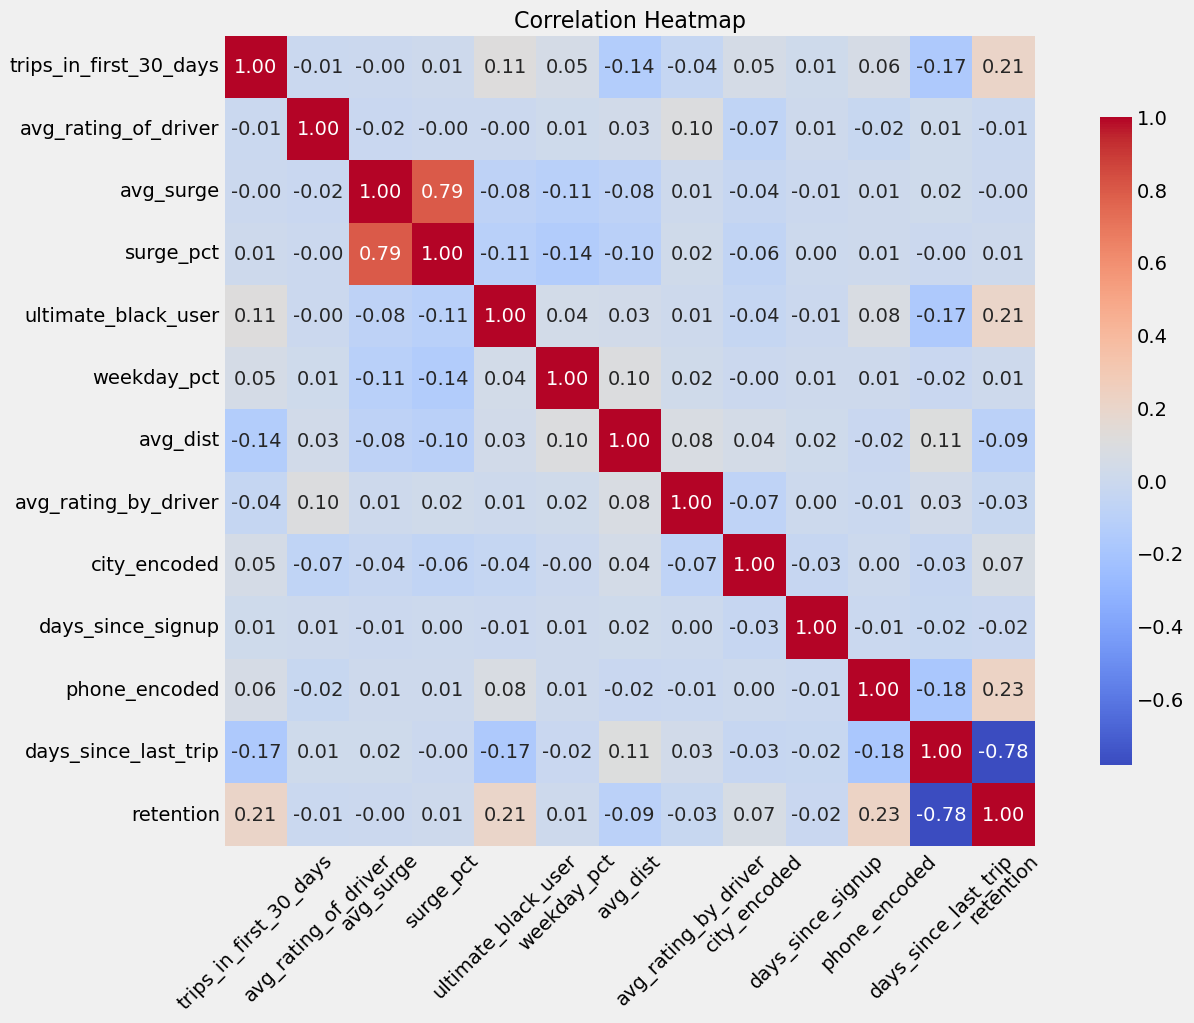

In [217]:
plt.figure(figsize=(15, 10))

sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

In [235]:
fraction_of_retention = (df['retention'] == 1).sum() / df.shape[0]

In [236]:
print(fraction_of_retention)

0.37609504380175207


Based on the corelations with retention, I am going to select phone_encoded, city_encoded, avg_dist, ultimate_black_user, and trips_in_first_30_days as the features for my model

In [237]:
model_df = df[['retention', 'phone_encoded', 'city_encoded', 'avg_dist', 'ultimate_black_user', 'trips_in_first_30_days']]

In [244]:
model_df.head()

,retention,phone_encoded,city_encoded,avg_dist,ultimate_black_user,trips_in_first_30_days
0,1,1,1,3.67,True,4
1,0,0,0,8.26,False,0
2,0,1,0,0.77,False,3
3,1,1,1,2.36,True,9
4,0,0,2,3.13,False,14


In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [261]:
X = model_df.drop('retention', axis=1)  
y = model_df['retention'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [262]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Optimized Model Accuracy: {accuracy_best:.2f}')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best Cross-Validation Score: 0.7337366983372922
Optimized Model Accuracy: 0.74


In [280]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


xgboost_model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=7,
    n_estimators=300,
    subsample=1.0
)

# Step 2: Fit the model on the training data
xgboost_model.fit(X_train, y_train)

# Step 3: Predict the labels for the test data
y_pred = xgboost_model.predict(X_test)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized XGBoost Model Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Optimized XGBoost Model Precision: {precision: .2f}")
      
recall = recall_score(y_test, y_pred)
print(f"Optimized XGBoost Recall Score: {recall: .2f}")

f1 = f1_score(y_test, y_pred)
print(f"Optimized XGBoost F1 Score: {f1: .2f}")

Optimized XGBoost Model Accuracy: 0.74
Optimized XGBoost Model Precision:  0.69
Optimized XGBoost Recall Score:  0.54
Optimized XGBoost F1 Score:  0.61


In [269]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy:.2f}')

Logistic Regression Model Accuracy: 0.70


In [272]:
logistic_model = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'saga'],  
    'penalty': ['l1', 'l2', 'elasticnet', None]}

grid_search = GridSearchCV(estimator=logistic_model, 
                             param_grid=param_grid, 
                             scoring='accuracy',  
                             cv=5,  
                             verbose=1,  
                             n_jobs=-1)  

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.6928345230653832


In [275]:
from skopt import BayesSearchCV

rf_model = RandomForestClassifier(random_state=42)


param_space = {
    'n_estimators': (10, 200),          
    'max_features': ['sqrt', 'log2'], 
    'max_depth': (1, 30),             
    'min_samples_split': (2, 10),      
    'min_samples_leaf': (1, 10),        
    'bootstrap': [True, False]         


bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_space,
    n_iter=50,                   
    scoring='accuracy',        
    cv=5,                      
    verbose=1,                     
    n_jobs=-1                     
)


bayes_search.fit(X_train, y_train)


print("Best Parameters:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi